# CMPE403 Data Science & Analytics
# Chapter 3: Machine Learning with Scikit Learn
* scikit-learn is powerful library for classical machine learning
* https://scikit-learn.org/stable/

In [1]:
# Uncomment below to install libraries
#!pip install -U scikit-learn numpy pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
# Import built-in datasets
from sklearn import datasets

# ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# For reproducibility of same results
np.random.seed(1234)

# plt.figure(figsize=(8, 6)) for all plots
plt.rcParams['figure.figsize'] = [8, 6]
#  for all plots
plt.rcParams['axes.grid'] = True

## Sklearn implementations

In [3]:
from sklearn.linear_model import LinearRegression

# Initialize a linear regression model
linear_reg_m = LinearRegression()

### Generate data using Sklearn

In [4]:
x_train, y_train = datasets.make_regression(n_samples=50, n_features=1, noise=6.0)
print(f'x.shape: {x_train.shape}')
print(f'y.shape: {y_train.shape}')

x.shape: (50, 1)
y.shape: (50,)


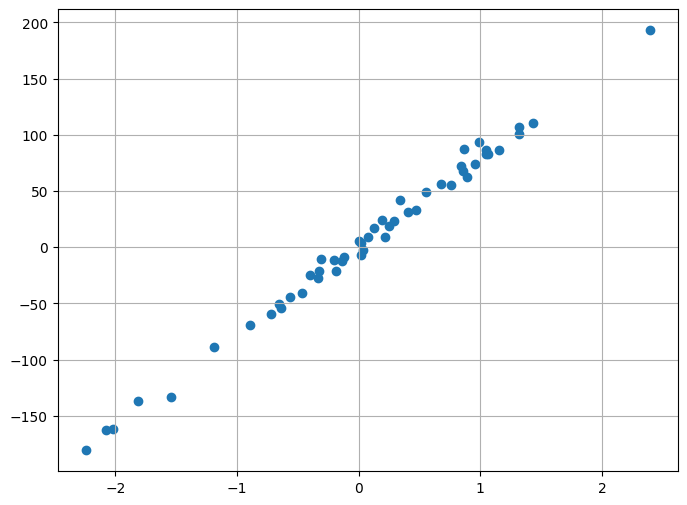

In [5]:
plt.scatter(x_train, y_train)

### Training the model: fit() 
* Fits model to data 
* Targets and predicted values should be close as possible for the best fit

In [6]:
linear_reg_m.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Score of the fit
* How well model fits the data
* Higher is better

In [7]:
linear_reg_m.score(x_train, y_train)

0.9936997425138728

# Univariate Linear Regression
### $y = w_0 + w_1x$

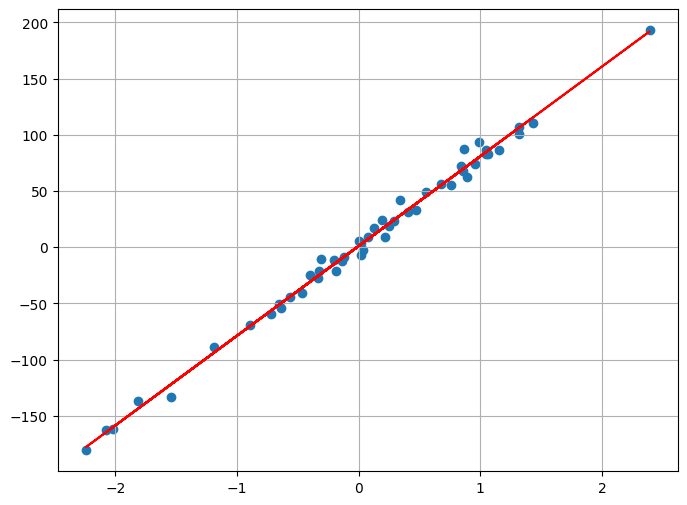

In [8]:
# y = w0 + w1*x
y_pred = linear_reg_m.intercept_ + linear_reg_m.coef_* x_train

plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, c='r')

### Make predictions with model: predict() 
* After model is trained, it is ready for prediction
* Predictions are best when model is nicely fit on data
* Sklearn models require 2D numpy array

x_test.shape: (1, 1)


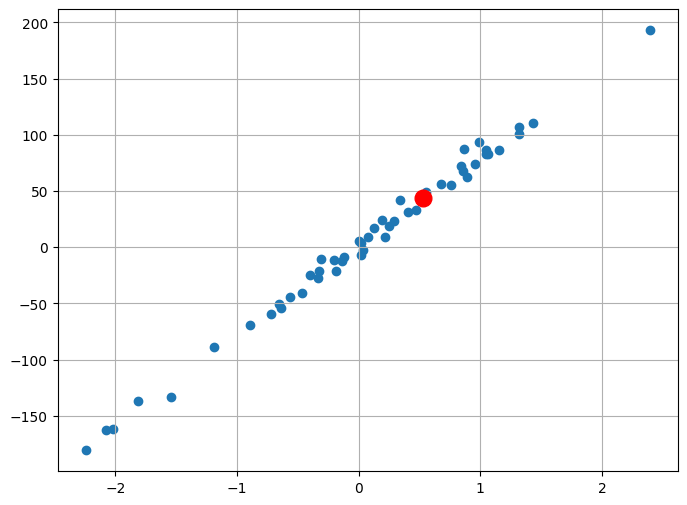

In [9]:
# Test data point as 2D numpy array
x_test = np.array([0.53]).reshape(1, -1)
print(f'x_test.shape: {x_test.shape}')

y_pred = linear_reg_m.predict(x_test.reshape(1, -1))


plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred, 'ro', markersize=12)

## Multivariate Linear Regression
* So far we discussed single a column of features and targets
* But most of the data contains more than one column of features
* In that case: features are (n_samples, n_features) and target is still (n_samples,)

* $M$ is number of features (n_features)
* $x_i$ is the $i^{th}$ input (features)
* $y$ is the prediction (targets)
* $w_i$ is $i^{th}$ parameter
* $w_0$ is called intercept (or bias)
* Note that $w_0$ can be written as $w_0x_0$ where $x_0$ is 1

$$ 
\large y = w_0 +  w_1x_1 + w_2x_2 + w_3x_3 + \dots
$$


$$ y = \sum_{i=0}^{M}w_ix_i$$


### Generate Synthetic Data with 4 Features

In [10]:
x_multi, y_multi = datasets.make_regression(n_samples=50, n_features=4, noise=6.0)
print(f'x_multi.shape: {x_multi.shape}')
print(f'y_multi.shape: {y_multi.shape}')

x_multi.shape: (50, 4)
y_multi.shape: (50,)


In [11]:
linear_reg_m = LinearRegression()

In [12]:
linear_reg_m.fit(x_multi, y_multi)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Coefficents for each feature
* these coefficents are $w_0$, $w_1$, $w_2$, $\dots$ as mentioned in the beginning

In [13]:
linear_reg_m.intercept_

-1.4808730907201735

### Coefficents for each feature
* these coefficents are $w_0$, $w_1$, $w_2$, $\dots$ as mentioned in the beginning

In [14]:
# Notice that we have more than one coef now
linear_reg_m.coef_

array([94.46008642, 96.44356959,  0.64031198, 94.3173364 ])

In [15]:
linear_reg_m.score(x_multi, y_multi)

0.998085511238602

### Performance score (for this model)

In [16]:
?linear_reg_m.score

Signature: linear_reg_m.score(X, y, sample_weight=None)
Docstring:
Return :ref:`coefficient of determination <r2_score>` on test data.

The coefficient of determination, :math:`R^2`, is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) o

# Actual dataset: Real Estate (Regression)
* https://www.kaggle.com/datasets/aidaeinabadi/realestate 

In [17]:
df_real_estate = pd.read_csv('Real estate.csv')
df_real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Check if there is missing data

In [18]:
df_real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Correlation Matrix
* Describes how correlated the columns in the data frame
* Useful when selecting features (columns) from data frame

In [19]:
correlation_matrix = df_real_estate.corr()
correlation_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## Heatmap of correlation matrix
* Positive correlation (towards 1.0): two columns are increasing or decreasing together
* Negative correlation (towards -1.0): one column is increasing while other is decresing (or vice versa)
* No correlation (around 0.0): Columns are not (or little) related

In [20]:
#!pip install seaborn
import seaborn as sns 

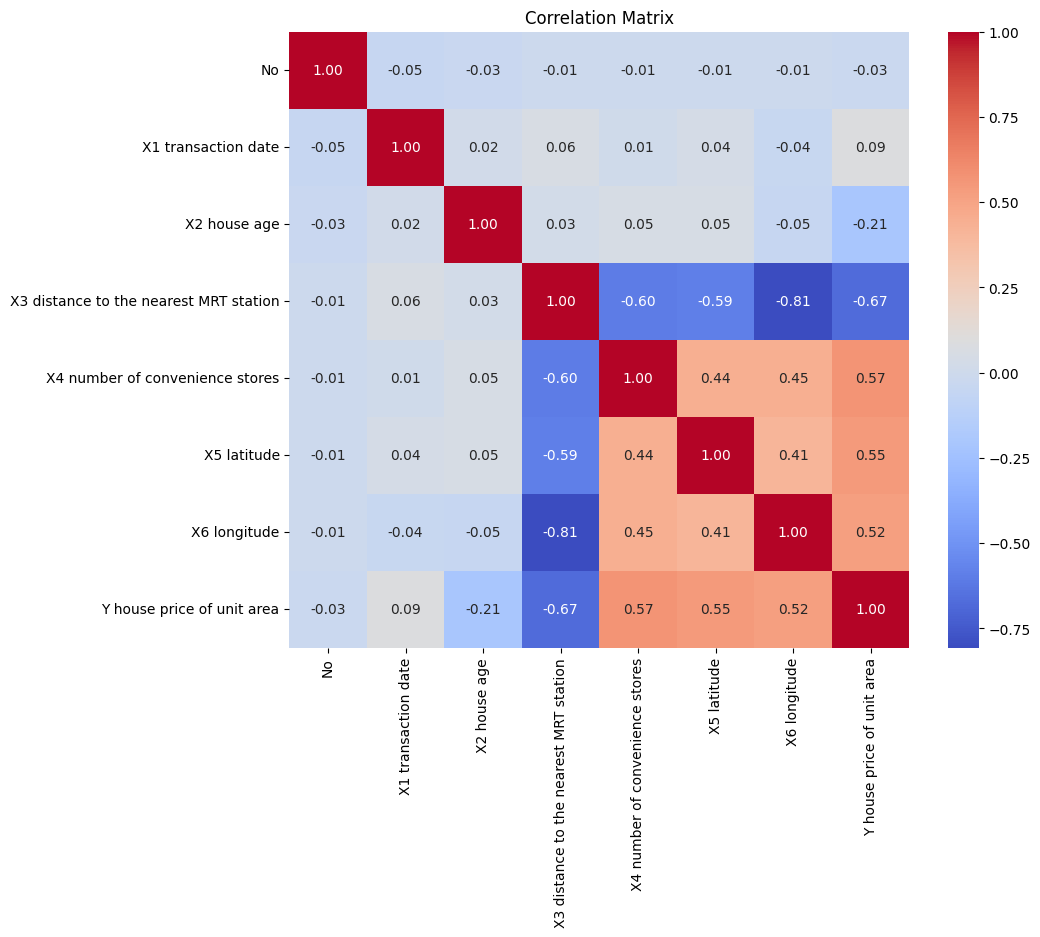

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.grid(False)
plt.show()

## Plot the Dataset

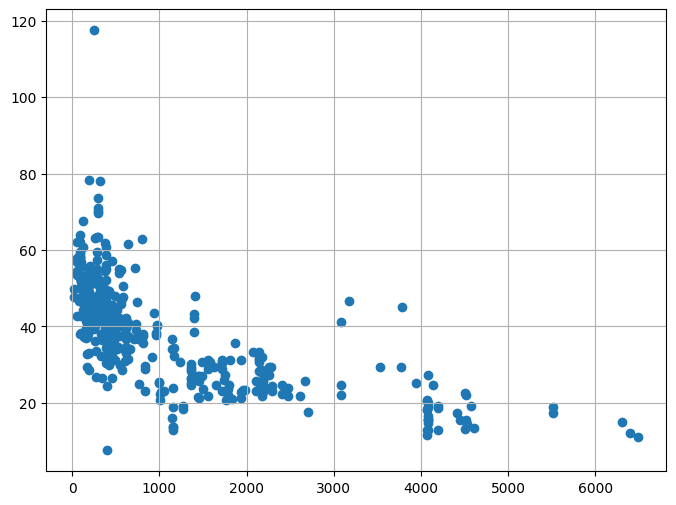

In [22]:
plt.scatter(df_real_estate['X3 distance to the nearest MRT station'], df_real_estate['Y house price of unit area'])

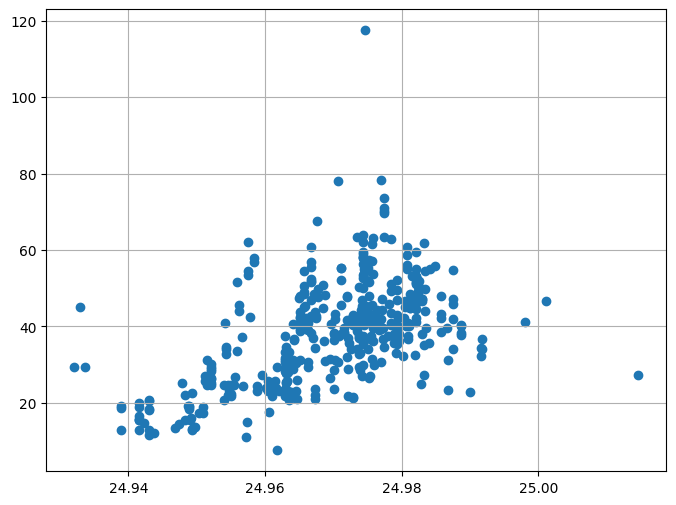

In [23]:
plt.scatter(df_real_estate['X5 latitude'], df_real_estate['Y house price of unit area'])

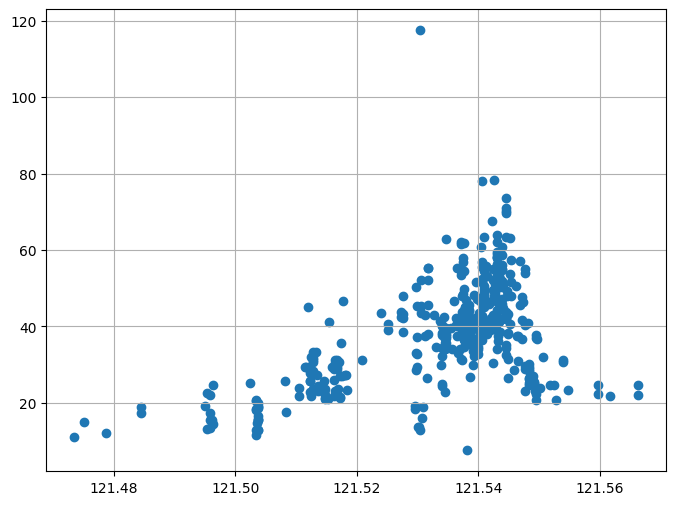

In [24]:
plt.scatter(df_real_estate['X6 longitude'], df_real_estate['Y house price of unit area'])

## Get Features and Target From DataFrame
* Features: Model Input
* Target: Model Output (Predictions)

In [25]:
features = df_real_estate.drop('Y house price of unit area', axis=1)
features.values.shape

(414, 7)

In [26]:
target = df_real_estate['Y house price of unit area']
target.values.shape

(414,)

In [27]:
linear_reg_m = LinearRegression()

linear_reg_m.fit(features, target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
linear_reg_m.score(features, target)

0.5833632616324658

## Polynomial transform
* Use a polynomial features
* Generates polynomial combinates of data: $1$, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly_transform = PolynomialFeatures(degree=2)

poly_features = poly_transform.fit_transform(features)
print(f'poly_features.shape: {poly_features.shape}')

linear_reg_m = LinearRegression()

linear_reg_m.fit(poly_features, df_real_estate['Y house price of unit area'])
linear_reg_m.score(poly_features, df_real_estate['Y house price of unit area'])

poly_features.shape: (414, 36)


0.7117043040101028

In [31]:
poly_transform = PolynomialFeatures(degree=4)

poly_features = poly_transform.fit_transform(features)
print(f'poly_features.shape: {poly_features.shape}')

linear_reg_m = LinearRegression()

linear_reg_m.fit(poly_features, df_real_estate['Y house price of unit area'])
linear_reg_m.score(poly_features, df_real_estate['Y house price of unit area'])

poly_features.shape: (414, 330)


0.7951050249452575

### Keep in mind: increasing complexity increases performance (but incrases change of overfitting)
* See: Overfitting, underfitting (bias-variance problem)

# Classification
### Predicting which category that belongs to (Ex: which flower, dog or cat etc.)
* Supervised (requires labeled dataset)
* Binary classification (categories are either 0 or 1)
* Multiclass classification (categories are more then two, 0, 1, 2...)
* Multilabel classification (more than one columns of targets)

In [32]:
# Generate synthetic binary classification (n_classes=2) data
x, y = datasets.make_classification(n_samples=50, n_features=4, n_classes=2)
print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (50, 4)
y.shape: (50,)


In [33]:
y

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0])

## Logistic Regression
* Similar to linear regression
* $\sigma$ is Sigmoid function (also called logistic function)
* Sigmoid function is also useful in artificial neural networks (as activation function) 
* Decision boundary is used for deciding which class (category) features belongs to
* Since output of sigmoid between (and including) 0.0 and 1.0, it can be considered as a probability 
* Classifiers in general gives as class probabilities as output 
* Consider highest probability class to be predicted class

$$ y = \sum_{i=0}^{M}\sigma(w_ix_i) $$

$$ \sigma(x_i) = \frac{1} {1 + e^{-x_i}} $$

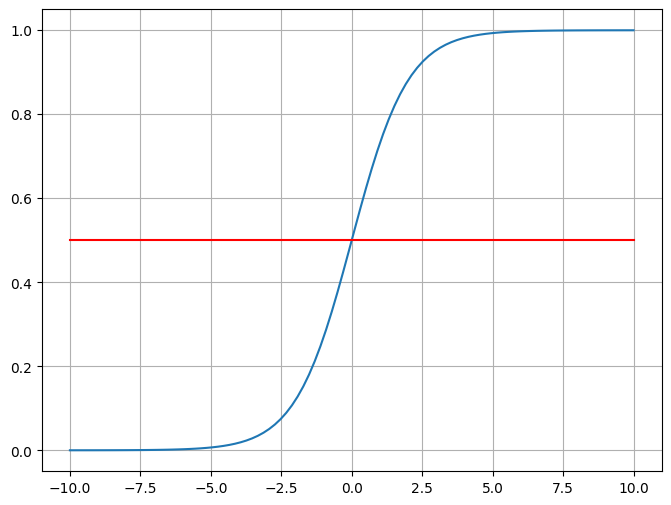

In [34]:
def sigma(x):
    return 1/(1 + np.exp(-x))

# Usually selected as 0.5
# In binary classification, classes are seperated by upper and lower regions
decision_boundary = 0.5

_x = np.linspace(-10, 10, 100)

plt.plot(_x, sigma(_x))
plt.plot(_x, decision_boundary*np.ones(shape=_x.shape), c='r')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [36]:
logistic_reg_m = LogisticRegression()

In [37]:
logistic_reg_m.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Coefficents for each feature
* these coefficents are $w_0$, $w_1$, $w_2$, $\dots$ as mentioned in the beginning

In [38]:
logistic_reg_m.coef_

array([[ 0.34917979, -1.09518374, -0.14694026,  1.3076405 ]])

In [39]:
#?logistic_reg_m.score

## Load Iris flower dataset (classification)

In [40]:
iris_dataset = datasets.load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
print(iris_dataset['data'].shape)
print(iris_dataset['target'].shape)
print(iris_dataset['feature_names'])

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [42]:
# Classes are integer indices but the actual classnames are here
class_names = iris_dataset['target_names']
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica
print(class_names)

['setosa' 'versicolor' 'virginica']


In [43]:
df_iris = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])
# Add target column to the data frame
df_iris['target'] = iris_dataset.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Check how many classes we have (for each)

In [44]:
# Iris dataset is class balanced
df_iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

# Clustering
* Grouping similar data
* Similarity functions are used (Ex: Euclidean Distance)
* Unsupervised learning (doesn't require labels)
* Harder to evaluate

x_y.shape: (100, 2)
cluster_ids.shape: (100,)


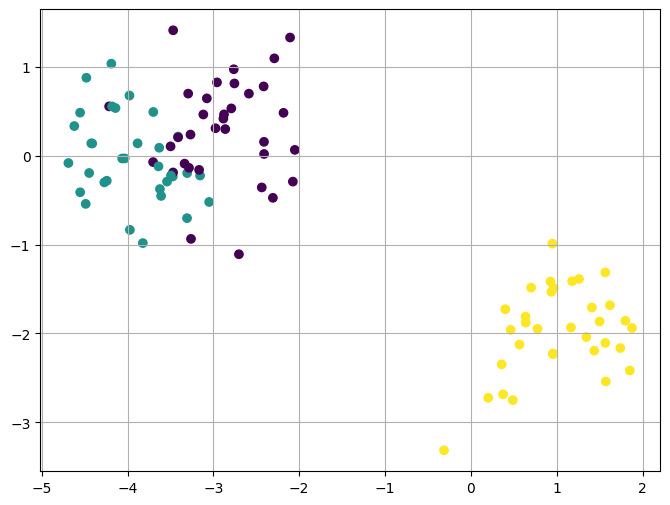

In [45]:
x_y, cluster_ids = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.5)

print('x_y.shape:', x_y.shape)
print('cluster_ids.shape:', cluster_ids.shape)

x = x_y[:, 0]
y = x_y[:, 1]

# Color is chosen for each cluster
# Important note: In the examples above, we were able to color different clusters 
# but in practice you won't have any labels (unsupervised)
plt.scatter(x, y, c=cluster_ids)

## K-Means clustering
* Finds cluster centers
* Randomly initializes cluster centers first
* By default, uses Euclidean distance to find similar data points
* Moves cluster centers until converged

$$
 d\left(x, y\right)   = \sqrt {\sum _{i=1}^{N}  \left( x_{i}-y_{i}\right)^2 } 
$$

* $N$ Number of datapoints
* $x_i, y_i$ are coordinates

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans_m = KMeans(n_clusters=3)

### Notice that targets are not required for model fitting (unsupervised)

In [48]:
kmeans_m.fit(x_y)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [49]:
kmeans_m.cluster_centers_

array([[-3.90598008, -0.03039148],
       [ 1.02682266, -1.97572483],
       [-2.72921807,  0.34055253]])

### Cluster ids predicted by K-Means for each sample

In [50]:
kmeans_m.labels_

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0,
       1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2])

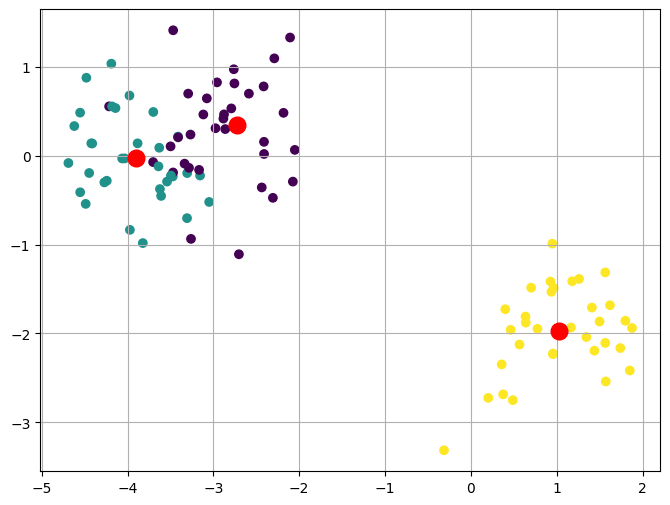

In [51]:
plt.scatter(x, y, c=cluster_ids)
# Plot the cluster centers predicted by K-Means clustering
plt.plot(kmeans_m.cluster_centers_[:, 0], kmeans_m.cluster_centers_[:, 1], 'ro', markersize=12)

## Noisy clusters

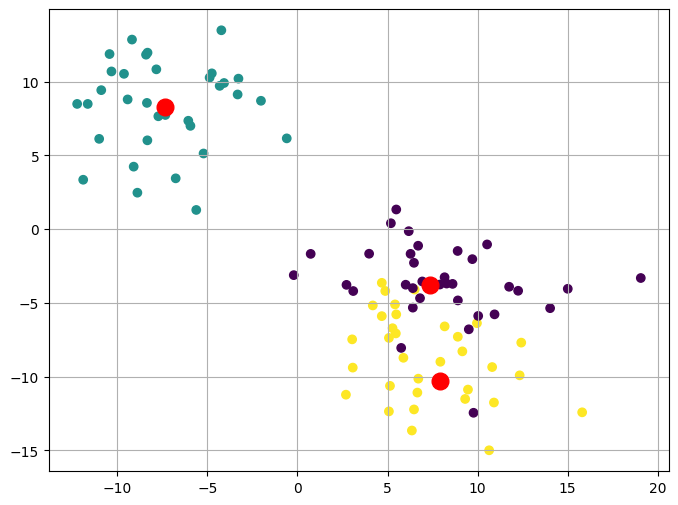

In [52]:
# Increase cluster_std to make noisy
x_y, cluster_ids = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=3.0)

kmeans_m = KMeans(n_clusters=3)

x = x_y[:, 0]
y = x_y[:, 1]

kmeans_m.fit(x_y)
plt.scatter(x, y, c=cluster_ids)
plt.plot(kmeans_m.cluster_centers_[:, 0], kmeans_m.cluster_centers_[:, 1], 'ro', markersize=12)

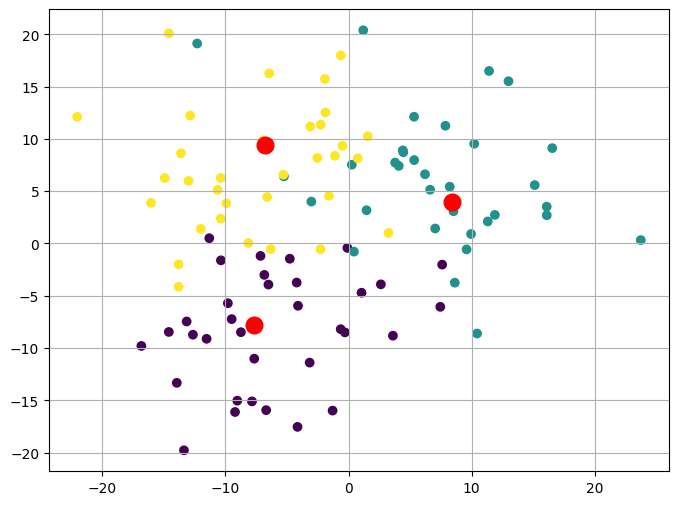

In [53]:
x_y, cluster_ids = datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=6.0)

kmeans_m = KMeans(n_clusters=3)

x = x_y[:, 0]
y = x_y[:, 1]

kmeans_m.fit(x_y)
plt.scatter(x, y, c=cluster_ids)
plt.plot(kmeans_m.cluster_centers_[:, 0], kmeans_m.cluster_centers_[:, 1], 'ro', markersize=12)

# Summary:
* Machine learning needs data to work
* Supervised learning requires labeled dataset, easy to evaluate
* Unsupervised learning doesn't require labeled dataset but hard to evaluate
* Unsupervised learning can be used in any data since labels are not required
* Data can have more than one feature, we must choose wisely
* Models can be trained to fit the data and make predictions (finding best parameters)
* Regression is used for predicting a continuous value
* Classification is used for predicting a category (class)
* Clustering is used grouping similar data
* Loss (cost) functions are used to evaluate the models